In [28]:
#multi dimensional Gaussian sampler (for hyperparameters mean and covariance in 5 dimensions)

In [ ]:
import numpy as np

In [3]:
def log_prob(x, mu, cov):
    diff = x - mu
    return -0.5 * np.dot(diff, np.linalg.solve(cov, diff))

In [4]:
ndim = 5

np.random.seed(42)
means = np.random.rand(ndim)

cov = 0.5 - np.random.rand(ndim**2).reshape((ndim, ndim))
cov = np.triu(cov)
cov += cov.T - np.diag(cov.diagonal())
cov = np.dot(cov, cov)

In [5]:
import emcee

nwalkers = 32
p0 = np.random.rand(nwalkers, ndim)
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[means, cov])

In [8]:
sampler.run_mcmc(p0, 100, progress=True)

100%|███████████████████████████████████████| 100/100 [00:00<00:00, 1533.94it/s]


State([[-0.26963855  1.8120408   1.06841869  0.85580144  0.48493763]
 [-0.48146636 -0.43384864  0.71343375  0.99821278  0.43312035]
 [ 0.5966904   0.91055814  0.66540856  0.70656085  0.59815162]
 [ 1.31016392  0.37891626  0.24346825  0.75976707  0.02120124]
 [ 1.32029507 -0.42436081 -0.1425091   1.13290293  0.44487194]
 [-0.47880328 -0.05355783  1.42570467  0.98956743  0.6065215 ]
 [ 0.07397233  2.90510012  1.65898846 -0.21501683 -0.30624377]
 [-0.14674987  2.2884906   1.6510928   0.1514233  -0.02297251]
 [ 0.26912956  0.9300058   0.93993314  0.98033893  0.47007855]
 [ 0.7706894   2.40440261  1.00811109  0.29549828  0.40778107]
 [ 0.37923431  0.15788738  0.97766263  0.79421172 -0.56294019]
 [ 0.10578229  1.35376814  0.64629322  0.64864988  0.5039548 ]
 [-0.27697994 -0.26260058  0.7619444   1.01800683  0.63662155]
 [ 1.24348757  0.6078499   0.01779993  0.7841243  -0.46499993]
 [ 0.19189673  2.10462195  1.02694054  0.38850882  0.07303975]
 [ 1.26870681  1.42701153  0.10649981  0.53771902

In [7]:
samples = sampler.get_chain()


IndexError: index 2 is out of bounds for axis 0 with size 2

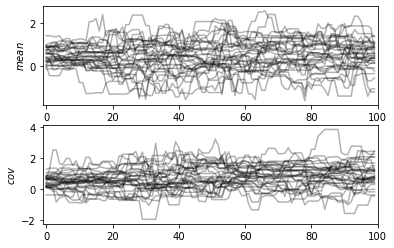

In [21]:
import matplotlib.pyplot as plt
fig, axes =plt.subplots(2)
labels=("$mean$","$cov$")
for i in range(ndim):
    ax=axes[i]
    ax.plot(samples[:,:,i],"k", alpha=0.3)
    ax.set_xlim(-1,len(samples))
    ax.set_ylabel(labels[i])


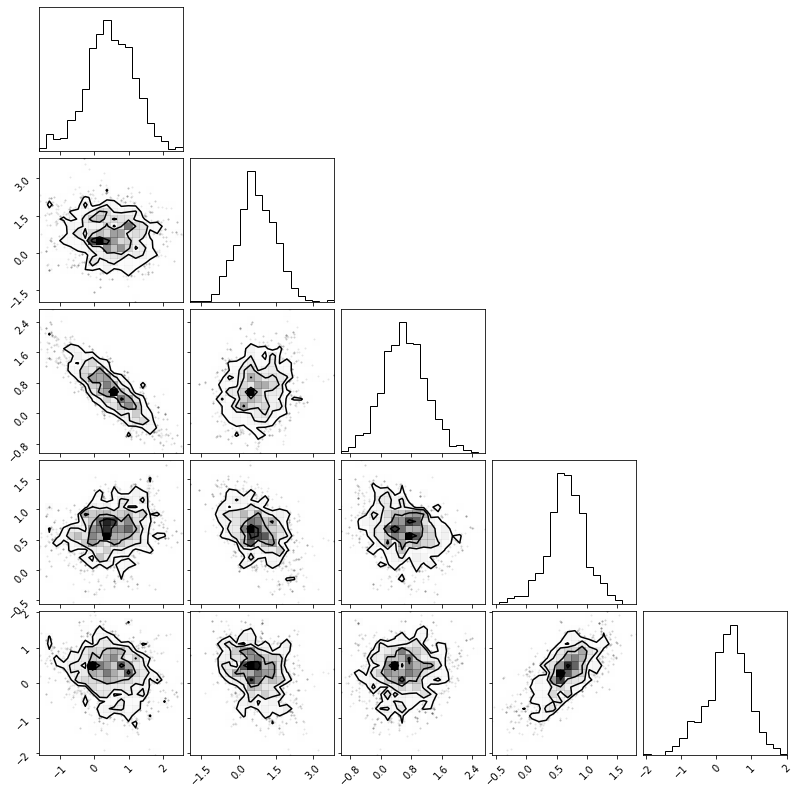

In [27]:
import corner
fig = corner.corner(samples)